# Who is the happiest?

In [185]:
file_2016=pd.read_csv('2016.csv')
file_2016.head(n=5)


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [186]:
new_names=['country', 'region','happiness_rank', 'happiness_score', 'lower', 'upper','gdp_capita', 'family', 'health_life_exp', 'freedom', 'gov_trust', 'generosity', 'dystopia_res']
file_2016.columns=new_names

In [187]:
file_2016.head(n=5)

,country,region,happiness_rank,happiness_score,lower,upper,gdp_capita,family,health_life_exp,freedom,gov_trust,generosity,dystopia_res
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [188]:
region_avg=file_2016.groupby(['region'],as_index=False)['happiness_score'].mean()
region_avg.head(n=5)

,region,happiness_score
0,Australia and New Zealand,7.323500
1,Central and Eastern Europe,5.370690
2,Eastern Asia,5.624167
3,Latin America and Caribbean,6.101750
4,Middle East and Northern Africa,5.386053


In [189]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np


In [190]:
regions=region_avg['region']
scores=round(region_avg['happiness_score'],2)
y_pos = np.arange(len(regions))

plot1=plt.figure(figsize=(6,6))
plot1=plt.barh(y_pos, scores, align='center', alpha=0.5, color='y')
plot1=plt.yticks(y_pos, regions, fontweight='bold')
plot1=plt.title("Average Happiness Score by Region", color='black')
plot1=plt.xlabel("Region", fontweight='bold')
plot1=plt.ylabel("Happiness Score", fontweight='bold')

for i, v in enumerate(scores):
    plot1=plt.text(v, i , str(v), color='blue', fontweight='bold')


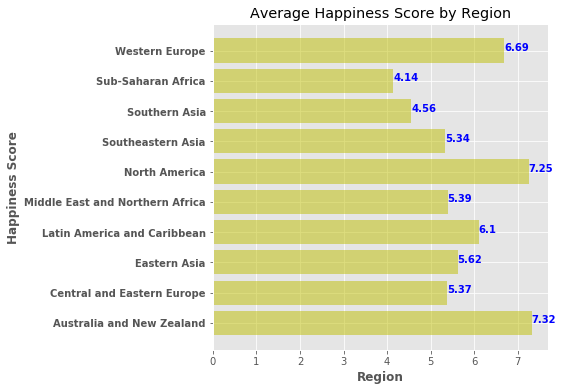

In [191]:
plt.show(plot1)

In [192]:
values=[file_2016['gdp_capita'].mean(), file_2016['family'].mean(), file_2016['health_life_exp'].mean(), file_2016['family'].mean(),file_2016['gov_trust'].mean(),  
 file_2016['generosity'].mean()]     
labels=['GDP per Capita', 'Family', 'Health/life Exp.', 'Freedom', 'Gov. Trust', 'Generosity']

plot2=plt.figure(figsize=(6,6))
plot2=plt.pie(values, labels=labels, 
        autopct='%1.1f%%', shadow=True, startangle=90)

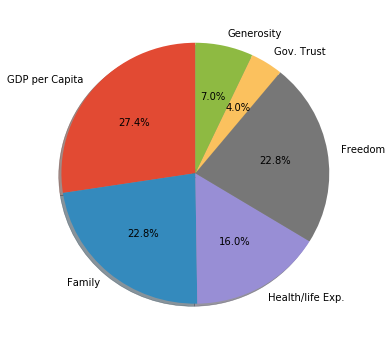

In [193]:
plt.show(plot2)

In [194]:
file_2016['living_hell']=file_2016['happiness_score']-file_2016['dystopia_res']
least_happy=file_2016.loc[file_2016['living_hell']<1.5]
least_happy_tb=(least_happy[['country', 'region']])


In [195]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
import plotly.figure_factory as ff
init_notebook_mode(connected=True)


table = ff.create_table(least_happy_tb)
plot(table)



'file:///Users/AnaS/Desktop/world-happiness-report/temp-plot.html'

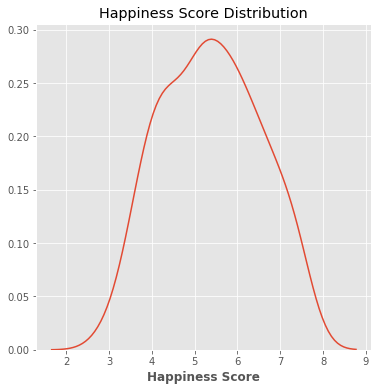

In [196]:
import seaborn as sns
plt.figure(figsize=(6,6))
sns.distplot(file_2016['happiness_score'], hist=False)
plt.title("Happiness Score Distribution", color="black")
plt.xlabel("Happiness Score", fontweight="bold")
plt.show()

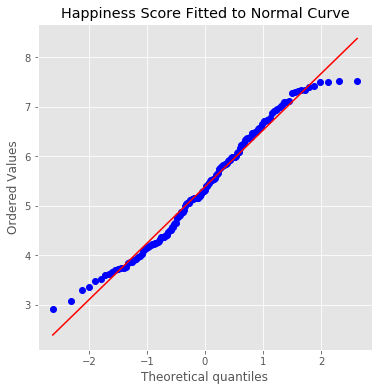

In [198]:
import scipy
plt.figure(figsize=(6,6))
scipy.stats.probplot(file_2016['happiness_score'],  dist='norm', fit=True, plot=plt)
plt.title("Happiness Score Fitted to Normal Curve")
plt.show()